# Computational Essay FYS2130

Hva må variere med lag? 
- sigma (blir større og større)
- theta (innfallsvinkel)
- A 
- K (dette skjer "naturli")
- Høyden på kappen og høyden på bunnen av laget

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
class Kappe: 
    def __init__(self, x, A):
        self.x, self.A = x, A
        
    def gauss(self, sigma):
        self.sigma = sigma
        x, A = self.x, self.A
        
        y = A * np.exp(-x**2 / (2*sigma**2))
        yder = -x/sigma**2 * y
        
        self.y, self.yder = y, yder
        return y, yder
        
        
    def harmonisk(self, skalering):
        self.skalering = skalering
        x, A = self.x, self.A
        
        y = np.cos(x * skalering) * A/2 + A/2
        yder = np.gradient(y, x[1]-x[0])
        
        self.y, self.yder = y, yder
        return y, yder
    
    
    def brytningsindeks(self, theta):
        self.theta = theta
        
        K = np.sin(theta) 
        n = K * np.sqrt(1 + self.yder**2) / self.yder
        n[np.abs(self.yder) < 0.001] = float('nan')
        
        self.K, self.n = K, n
        return n
        
    
    def plot_kappe(self):
        plt.plot(self.x,self.y)
        plt.plot(self.x, self.yder, '--')
        plt.show()
      
    
    def plot_n(self):
        plt.plot(self.x,self.n)
        plt.show()
       
    
    def add_gaussian_layers(self, AN, sigmaN, thetaN, N): 
        y = np.zeros([N,len(self.x)])
        yder = np.zeros([N,len(self.x)])
        n = np.zeros([N,len(self.x)])
        
        A1 = self.A
        dA = (AN - A1)/(N-1)
        
        sigma1 = self.sigma
        dsigma = (sigmaN - sigma1)/(N-1)
        
        theta0 = self.theta
        dtheta = (thetaN - theta0)/(N-1) 
        
        for i in range(N):
            self.A = A1 + i*dA
            sigma = sigma1 + i*dsigma
            theta = theta0 + i*dtheta
            y[i,:], yder[i,:] = self.gauss(sigma)
            n[i,:] = self.brytningsindeks(theta)
        
        return y, yder, n        

In [3]:
# kappe/usynlig person:
h1 = 1.5 # [m] høyde under kappe
sigma1 = 1 # [m] std. innerste kappe
x1 = 4 # [m] 1/2 bredde på innerste kappe

# (ikke-)observant:
H = 1.7 # [m] høyde på Voldemort
L = 10 # [m] avstand fra Harry
L_ = L - x1 # avstand fra kappe


skalering = np.pi/(x1*4/5)
theta0 = np.arctan(H/L)
thetaN = np.arctan((H - h1)/(L_))
sigmaN = 2
AN = h1 + 0.1
N = 10

x = np.linspace(-x1, x1, 1000)

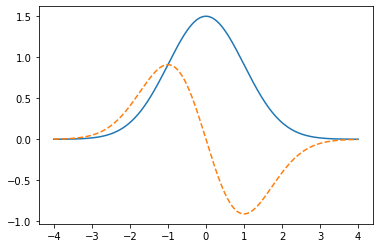

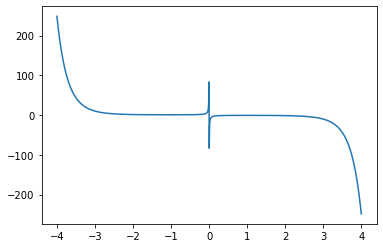

In [4]:
kappe1 = Kappe(x, h1)
y, yder = kappe1.gauss(sigma1)
n = kappe1.brytningsindeks(np.pi/6)

kappe1.plot_kappe()
kappe1.plot_n()

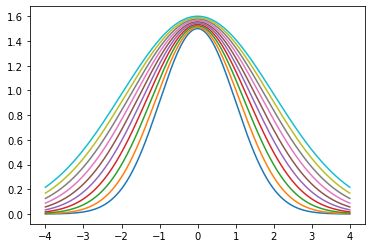

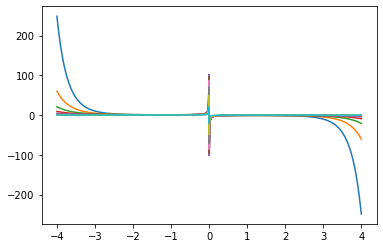

In [5]:
y, yder, n = kappe1.add_gaussian_layers(AN, sigmaN, thetaN, N)

for i in range(N):
    plt.plot(x, y[i,:])
plt.show()

for i in range(N):
    plt.plot(x, n[i,:])
plt.show()

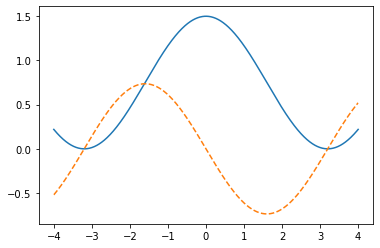

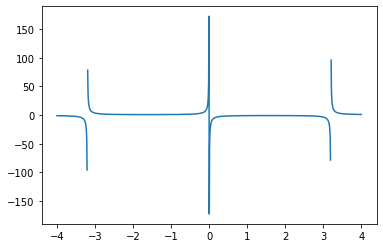

In [9]:
kappe2 = Kappe(x, h1)
y,yder = kappe2.harmonisk(skalering)
n = kappe2.brytningsindeks(np.pi/6)

kappe2.plot_kappe()
kappe2.plot_n()

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
h_H = 1.5 # Høyde Harry 
h_V = 1.7 # Høyde Voldemort 
N = 20 # antall lag i kappen 
L = 8 # m, avstand fra Voldemort til Harrys kappe, langs bakken
l0 = 2 #m, avstand fra starten av kappen inn til Harry

sigma = 0.6 # Denne avhenger av hvilket lag i kappen vi ser på  (burde avhenge av hvor mange lag vi har)


y = lambda x, A, sigma: A * np.exp(- x**2 / (2*sigma**2)) 
y_ = lambda x, A, sigma: -x/(sigma)**2 * y(x, A, sigma)

x = np.linspace(-2,2, 1000)

plt.plot(x, y(x,h_H,sigma))
#print(np.max(y(x,h_H,sigma)))

In [ ]:
# Lager array med ulike innfallsvinkler:
# Denne baserer seg på en lineær endring i angrepspunkt, Hva med en gaussisk endring?
theta0 = np.arctan(h_V/L)
thetaN = np.arctan((h_V - h_H)/(L + l0))
dtheta = (thetaN - theta0)/(N-1)
theta = np.linspace(theta0, thetaN + dtheta, N)  

plt.scatter(range(N),theta)
# Ønsker å koble innfallsvinkler mot de andre størrelsene  

In [ ]:
# Lager array med ulike bredder på lagene
sigma0 = 0.5 
sigmaN = 1.5 
dsigma = (sigmaN - sigma0) / (N-1)
sigma = np.linspace(sigma0, sigmaN + dsigma, N) 

# OBS, høyden minker også når sigma øker 

In [ ]:
i = np.linspace(0, N-1, N)

dH = h_H/N
A = h_H - i*dh 
 

In [ ]:
for i in range(N):
    y = lambda x: A[i] * np.exp(- x**2 / (2*sigma[i]**2)) + i*dH
    plt.plot(x, y(x), label=f'{i}')
#plt.legend()

In [ ]:
def ref_index(x, theta0): 
    K = np.sin(theta0)
    n = K/y_(x, h_H, sigma) * np.sqrt(1 + y_(x, h_H, sigma)**2)
    
    return n 
    
n = ref_index(x,np.pi/4) 

plt.plot(x, n)
plt.ylim(-10, 10)
plt.grid()

In [ ]:
%reset -f 
import numpy as np 
import matplotlib.pyplot as plt 

#Vil lage et program hvor innfalsvinklene (theta) avgjør hvordan kappen ser ut. Hvilke parabler må avgjøres?
    # sigma 
    # konstantleddet 
    
theta = 

h_H = 1.5 # Høyde Harry 
h_V = 1.7 # Høyde Voldemort 
N = 20 # antall lag i kappen 
L0 = 8 # m, avstand fra Voldemort til Harrys kappe, langs bakken

theta0 = np.arctan(h_V/L0)

y = lambda x, A, sigma: A * np.exp(- x**2 / (2*sigma**2)) 
y_ = lambda x, A, sigma: -x/(sigma)**2 * y(x, A, sigma)

x0 =  #der hvor lysstrålen treffer kappen 
phi0 = np.arctan(y_(x0))

In [ ]:
# Endring i L vil skje med endring i kappen 
L = np.tan(theta)